#  Decision Tree on Complete Diamonds Price Dataset

The **Diamonds dataset** from Kaggle is a dataset containing information about the physical and pricing attributes of nearly 54,000 diamonds.

Compared to Homework 1, in this case we will consider 8,000 samples of the **complete** dataset (i.e. without excluding categorical variables).

### Key Features:
- **Carat**: The weight of the diamond.
- **Cut**: Quality of the cut.
- **Color**: Diamond colour.
- **Clarity**: The measurement of how clear the diamond is.
- **Depth**: The total depth percentage (z / mean(x, y)).
- **Table**: Width of the diamond's top as a percentage of its widest point.
- **Price**: Price in US dollars.
- **X, Y, Z**: Dimensions of the diamond in mm (length, width, depth).

This dataset is useful for exploring relationships between physical attributes and pricing, and for building predictive models to estimate diamond prices based on their features.

For more information see: https://www.kaggle.com/datasets/shivam2503/diamonds.

# Overview

In the notebook you will perform a complete pipeline of decision tree - regression task. 
First, you will:
- perform the ordinal encoding of categorical variables;
- split the data into training and test set;
- standardize the data.

You will then be asked to learn various decision tree models. 

1. Start by training a decision tree without any limitations (i.e., leaving the **default hyperparameters**).
2. Next, try to set a **different value for max_depth** hyperparameter to see what happens.
3. Then, identify the optimal max_depth through **cross-validation**.
5. Learn the decision tree with optimal max_depth found above.
6. Inspect the importance of each feature and print the name of the best ones.
7. Compare the best decision tree obtained above with a standard Linear Regressor.
 
### IMPORTANT.
- Note that in each of the above steps you will have to choose the appropriate split of the data (see the second bullet point above);
- The code should run without requiring modifications even if some best choice of parameters changes; for example, you should not pass the best value of hyperparameters "manually" (i.e., passing the values as input parameters to the models). The only exception is in the TO DO titled 'ANSWER THE FOLLOWING'
- Do not change the printing instructions (other than adding the correct variable name for your code), and do not add printing instructions!

## TO DO -- Insert your ID number ("numero di matricola") below

In [1]:
# -- put here your ID Number ("numero di matricola")
numero_di_matricola = 2095665

In [2]:
# -- import some packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -- load the data (csv format)
df = pd.read_csv('diamonds.csv', sep = ',')

# -- remove the data samples with missing values (NaN)
df = df.dropna()

# -- drop the column containing the id of the data
df = df.drop(columns=['Unnamed: 0'], axis=1)

# -- print the column names together with their data type
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [4]:
# -- print the first 5 rows of the dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Ideal,G,SI2,62.1,57.0,4350,6.48,6.44,4.01
1,0.59,Ideal,E,VVS2,61.8,56.0,2515,5.39,5.42,3.34
2,1.02,Ideal,F,VVS1,62.4,56.0,9645,6.44,6.42,4.01
3,1.01,Premium,H,SI1,61.2,58.0,4642,6.47,6.43,3.95
4,0.41,Ideal,G,VS1,61.5,56.0,961,4.79,4.77,2.94


In the following cell, we convert our (pandas) dataframe into set X (containing our features) and the set Y (containing our target, i.e., the price)

In [5]:
# -- compute X and Y sets
X = df.drop(columns=['price'], axis=1)
Y = df['price']

print("Total number of samples:", X.shape[0])

# -- print the features names
features_names = list(X.columns)
print("Features names:", features_names)

X = X.values
Y = Y.values

# -- print shapes
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

Total number of samples: 8000
Features names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
X shape:  (8000, 9)
Y shape:  (8000,)


# Data Pre-Processing

## TO DO -- ORDINAL ENCODING OF CATEGORICAL VARIABLES

Use the $\texttt{preprocessing.OrdinalEncoder}$ from scikit learn to perform ordinal encoding of the three categorical variables: **cut**, **color**, and **clarity**.

***NOTE***: Use the input parameter $\texttt{categories}$ to specify, from worst to best, the levels for each categorical variable. In detail:
- Cut: ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
- Color: ['J', 'I', 'H', 'G', 'F', 'E', 'D']
- Clarity: ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

For more information see: https://www.kaggle.com/datasets/shivam2503/diamonds.

We first print the data type of each column, returning both column name and its corresponding index in X.

In [6]:
# -- print the data type of each column
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column carat (index: 0) -- data type: <class 'float'>
Column cut (index: 1) -- data type: <class 'str'>
Column color (index: 2) -- data type: <class 'str'>
Column clarity (index: 3) -- data type: <class 'str'>
Column depth (index: 4) -- data type: <class 'float'>
Column table (index: 5) -- data type: <class 'float'>
Column x (index: 6) -- data type: <class 'float'>
Column y (index: 7) -- data type: <class 'float'>
Column z (index: 8) -- data type: <class 'float'>


Now let's encode the categorical variables.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Categories for each column sorted by quality
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categories = [cut, color, clarity]

# Encoder creation
encoder = OrdinalEncoder(categories=categories)

# Search the index of the categorical columns (if the order changes)
categorical_cols = ['cut', 'color', 'clarity']	# These are the columns that are categorical
categorical_indices = [features_names.index(col) for col in categorical_cols]  # If the order stays the same they should be [1, 2, 3]

# Encoding
X[:, categorical_indices] = encoder.fit_transform(X[:, categorical_indices])

Check if the encoding was done correctly.

In [12]:
# -- print the data type of each column
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column carat (index: 0) -- data type: <class 'float'>
Column cut (index: 1) -- data type: <class 'float'>
Column color (index: 2) -- data type: <class 'float'>
Column clarity (index: 3) -- data type: <class 'float'>
Column depth (index: 4) -- data type: <class 'float'>
Column table (index: 5) -- data type: <class 'float'>
Column x (index: 6) -- data type: <class 'float'>
Column y (index: 7) -- data type: <class 'float'>
Column z (index: 8) -- data type: <class 'float'>


## TO DO -- SPLIT DATA INTO TRAINING AND TEST SET, WITH THE FOLLOWING PERCENTAGES: 80% AND 20%

First, compute the number of samples to be included in the training set (i.e., 80% of the data) and the number of samples to be included in the test set (i.e., 20% of the data) and print such values.

In [13]:
# -- split data into train (4/5 of samples) and test data (1/5 of samples)

# -- TO DO
train_percent = 0.8
test_percent = 0.2

train_size = int(X.shape[0] * train_percent)
test_size = int(X.shape[0] * test_percent)

print("Amount of data for training and deciding parameters:", train_size)
print("Amount of data for test:", test_size)

Amount of data for training and deciding parameters: 6400
Amount of data for test: 1600


Next, use the $\texttt{train\_test\_split}$ function from sklearn.model_selection to split the data; in every call fix $\texttt{random\_state}$ to your numero_di_matricola. 
At the end, you should store the data in the following variables:
- X_train, Y_train: training data;
- X_test, Y_test: test data.

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_percent, test_size=test_percent, random_state=numero_di_matricola)

## TO DO -- DATA STANDARDIZATION

Stardardise the data using $\texttt{preprocessing.Standardscaler}$ from scikit learn.

If V is the name of the variable storing part of the data, the corresponding standardized version should be stored in V_scaled. For example, the scaled version of X_train should be stored in X_train_scaled.
 
For simplicity, with the function $\texttt{copy}$, create a copy of the variable V by calling it V_scaled and then apply the scaler to this copy.

***NOTE***: standardise only the 6 continuous variables (**carat**, **depth**, **table**, **x**, **y**, **z**) and not the 3 categorical variables just encoded.

In [16]:
# -- data standardization
from sklearn.preprocessing import StandardScaler

# -- Define the list of continuous variables to be standardized
continuous_vars = ['carat', 'depth', 'table', 'x', 'y', 'z']

# -- Define the indices of continuous variables to be standardized
continuous_indices = [features_names.index(var) for var in continuous_vars]

# -- Create the copies of the training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# -- Create a StandardScaler object and fit it on the training set
scaler = StandardScaler().fit(X_train[:, continuous_indices])

# -- Apply the scaler on the training and test sets
X_train_scaled[:, continuous_indices] = scaler.transform(X_train_scaled[:, continuous_indices])
X_test_scaled[:, continuous_indices] = scaler.transform(X_test_scaled[:, continuous_indices])


# Decision tree models

Decision trees are supervised machine learning models used for both **classification** and **regression** tasks. They are structured like a tree, where each node represents a condition on the data, each branch corresponds to a possible answer, and the leaves represent the final outcome (class or value). In this homework, you will use decision trees in a regression setting to predict the price of diamonds.

## TO DO -- DEFAULT SETTINGS

Learn a decision tree leaving the default values for the hyperparameters. Set only $\texttt{random\_state}$ to your numero_di_matricola.

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
default_tree = DecisionTreeRegressor(random_state=numero_di_matricola)

# Fit the model on the training data
default_tree.fit(X_train_scaled, Y_train)

# Calculate the score (coefficient of determination R^2) of the model
# on the training set
score_train = default_tree.score(X_train_scaled, Y_train)

# and on the test set
score_test = default_tree.score(X_test_scaled, Y_test)

Print the value of 1 - coefficient of determination $(R^2)$, to evaluate how well the model fits both the training and test data. 

In [18]:
print("1 - coefficient of determination on training data:", 1 - score_train)
print("1 - coefficient of determination on test data:", 1 - score_test)

1 - coefficient of determination on training data: 5.233874333931965e-08
1 - coefficient of determination on test data: 0.04594371236867023


Check what are some of the characteristics of the tree, like its depth and the number of nodes.

In detail, print:
- ***max_depth***: limits the maximum depth of the tree, controlling how many splits it can make.
- ***node_count***: represents the total number of nodes in the tree, including both internal nodes and leaf nodes.

In [19]:
print("Depth of the tree:", default_tree.get_depth())
print("Number of nodes:", default_tree.tree_.node_count)

Depth of the tree: 28
Number of nodes: 11831


## TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

Based on the 1 - coefficient of determination $(R^2)$ values on training and test set and based on the max_depth/node_count, what conclusions could you draw regarding the trained model?

In [20]:
print("\nANSWER")

# -- the following is a string with you answer
motivation = (
    "The significant gap between training and test 1 - coefficient of determination (R²) indicates that the model is overfitting.\n"
    "This is confirmed by the tree's high depth and node count, which suggest excessive complexity.\n"
    "Additionally, the near-perfect training score shows the model is over-adapting to the training data, reducing its ability to generalize.\n"
    "To address this, we can reduce the model's complexity by properly adjusting the hyperparameters."
)

print(motivation)


ANSWER
The significant gap between training and test 1 - coefficient of determination (R²) indicates that the model is overfitting.
This is confirmed by the tree's high depth and node count, which suggest excessive complexity.
Additionally, the near-perfect training score shows the model is over-adapting to the training data, reducing its ability to generalize.
To address this, we can reduce the model's complexity by properly adjusting the hyperparameters.


## TO DO -- SET A DIFFERENT VALUE FOR max_depth

Now, try with a different value for $\texttt{max\_depth}$ hyperparameter. Set it equals to 2 and $\texttt{random\_state}$ to your numero_di_matricola, than fit the decision tree.

In [21]:
max_depth = 2

# Create a DecisionTreeRegressor object
tree_max_depth = DecisionTreeRegressor(max_depth=max_depth ,random_state=numero_di_matricola)

# Fit the model on the training data
tree_max_depth.fit(X_train_scaled, Y_train)

# Calculate the score (coefficient of determination R^2) of the model
# on the training set
score_train = tree_max_depth.score(X_train_scaled, Y_train)

# and on the test set
score_test = tree_max_depth.score(X_test_scaled, Y_test)

Let's print the error obtained by this model on both training and test data.

In [22]:
# -- print the value of 1 - coefficient of determination R^2, for the training and test data
print("1 - coefficient of determination on training data:", 1 - score_train)
print("1 - coefficient of determination on test data:", 1 - score_test)

1 - coefficient of determination on training data: 0.16896614978912883
1 - coefficient of determination on test data: 0.1709525532158398


Let's plot the tree.

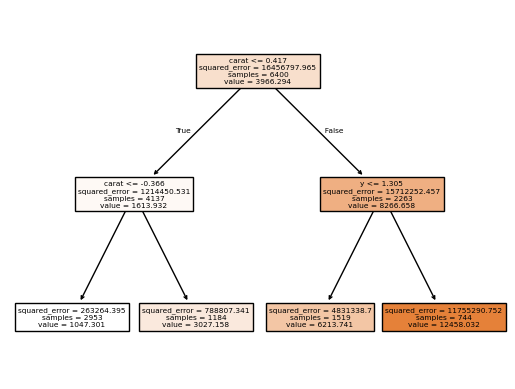

In [23]:
from sklearn import tree

plt.figure()
tree.plot_tree(decision_tree = tree_max_depth,
               feature_names=features_names,
               class_names=['price'],
               filled=True)
plt.savefig('tree.pdf')
plt.show()

## TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

Based on the 1 - coefficient of determination $(R^2)$ values on training and test set and based on the max_depth/node_count, what conclusions could you draw regarding this new trained model?

In [24]:
print("\nANSWER")

# -- the following is a string with you answer
motivation = (
    "The reduced tree depth and node count have improved the model's generalization,\n"
    "as shown by the smaller gap between the training and test 1-coefficient of determination (R²).\n"
    "Although the model now has lower training and test scores then before, this does not necessarily indicate underfitting.\n"
    "Instead, it reflects the model's reduced complexity.\n"
    "This highlights the trade-off between model complexity and generalization,\n"
    "emphasizing the importance of finding the right balance for the specific problem."
)
print(motivation)


ANSWER
The reduced tree depth and node count have improved the model's generalization,
as shown by the smaller gap between the training and test 1-coefficient of determination (R²).
Although the model now has lower training and test scores then before, this does not necessarily indicate underfitting.
Instead, it reflects the model's reduced complexity.
This highlights the trade-off between model complexity and generalization,
emphasizing the importance of finding the right balance for the specific problem.


## TO DO -- DECISION TREE WITH CROSS-VALIDATION FOR max_depth TUNING

Perform $k$-fold cross validation (with $k$ = 5) with respect to the parameter $\texttt{max\_depth}$, with $\texttt{max\_depth}$ ranging from 1 to 30 included.

**Note**: consider only **integer** values for $\texttt{max\_depth}$!

At the end, note that you need to store in $\texttt{max\_depth\_opt}$ the best value for $\texttt{max\_depth}$ you found with the cross-validation procedure.

In [ ]:
from sklearn.model_selection import KFold

# -- define the grid for the max_depth hyperparameter

max_depth_grid = np.arange(1, 31)

# -- initialize the vector for the errors (1 - R^2)

err_train_kfold = np.zeros(max_depth_grid.shape)
err_val_kfold = np.zeros(max_depth_grid.shape)

# -- perform kfold cross validation for model selection (k = 5)

k = 5	# Number of splits

# Create a KFold object
kf = KFold(n_splits = k)

# Iterate over the max_depth values
for i, max_depth in enumerate(max_depth_grid):
	# Create a DecisionTreeRegressor object
	tree = DecisionTreeRegressor(max_depth=max_depth, random_state=numero_di_matricola)

	for train_index, val_index in kf.split(X_train):  # Split the unstandardized data
		# Split the data
		X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
		Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[val_index]

		# Standardize the data with respect to the fold
		X_train_kfold_scaled = X_train_kfold.copy()
		X_val_kfold_scaled = X_val_kfold.copy()
		scaler = StandardScaler().fit(X_train_kfold[:, continuous_indices])
		X_train_kfold_scaled[:, continuous_indices] = scaler.transform(X_train_kfold_scaled[:, continuous_indices])
		X_val_kfold_scaled[:, continuous_indices] = scaler.transform(X_val_kfold_scaled[:, continuous_indices])

		# Fit the model
		tree.fit(X_train_kfold_scaled, Y_train_kfold)

		# Calculate (1 - R^2) as error
		err_train_kfold[i] += 1 - tree.score(X_train_kfold_scaled, Y_train_kfold)
		err_val_kfold[i] += 1 - tree.score(X_val_kfold_scaled, Y_val_kfold)

# Average the errors
err_train_kfold /= k
err_val_kfold /= k

# Find the index of the minimum validation error
opt_idx = np.argmin(err_val_kfold)

# -- choose the regularization parameter that minimizes the loss
max_depth_opt = max_depth_grid[opt_idx]  # opt_idx corresponds to the index of the optimal value of the max_depth parameter
print('Best value of the max_depth parameter:', max_depth_opt)
print('Min. validation error (1 - R²) ', err_val_kfold[opt_idx])   # -- print the minimum validation error without finding again the minimum,
																	#but using the variable opt_idx that contains the index of the minimum

Best value of the max_depth parameter: 8
Min. validation error (1 - R²)  0.03885881300929535


Plot validation and test error (1 - $R^2$) for different values of $\texttt{max\_depth}$.

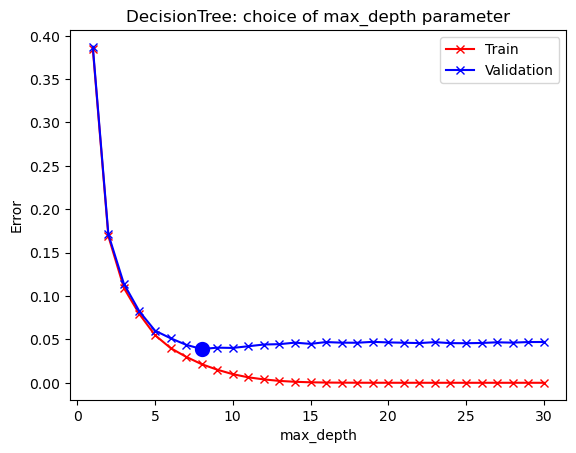

In [27]:
# -- plot the training error
plt.plot(max_depth_grid,
         err_train_kfold,
         color='r',
         marker='x')

# -- plot the validation error
plt.plot(max_depth_grid,
         err_val_kfold,
         color='b',
         marker='x')

# -- highlight min loss
plt.scatter(max_depth_opt,
            np.min(err_val_kfold),
            color='b',
            marker='o',
            linewidths=5)

plt.legend(['Train', 'Validation'])
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.title('DecisionTree: choice of max_depth parameter')
plt.savefig('train_val_loss.pdf')
plt.show()

Learn the final model using the optimal _max_depth_ obtained above and print the error (1 - R²) of the model on both the training and test data.

In [28]:
# Create a DecisionTreeRegressor object
best_tree = DecisionTreeRegressor(max_depth=max_depth_opt ,random_state=numero_di_matricola)

# Fit the model on the training data
best_tree.fit(X_train_scaled, Y_train)

# Calculate the score (coefficient of determination R^2) of the model
# on the training set
best_score_train = best_tree.score(X_train_scaled, Y_train)

# and on the test set
best_score_test = best_tree.score(X_test_scaled, Y_test)

print("1 - coefficient of determination on training data:", 1 - best_score_train)
print("1 - coefficient of determination on test data:", 1 - best_score_test)

1 - coefficient of determination on training data: 0.02287023813167266
1 - coefficient of determination on test data: 0.03658945264138258


## TO DO -- FEATURE IMPORTANCE

Inspect the importance of each feature for the best decision tree obtained using the property $\texttt{feature\_importances\_}$ of $\texttt{DecisionTreeRegressor}$ class. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [29]:
print(best_tree.feature_importances_)

[6.73926750e-01 3.79039020e-04 2.81836689e-02 6.64904498e-02
 1.90566210e-03 3.81529187e-04 5.57824138e-03 2.21589474e-01
 1.56518532e-03]


Print the names of the three most importante features. To do this:
1. Get the indexes of the top-3 features according to their importance;
2. Print the name of each of the top-3 feature using the format "feature_name feature_index" (e.g., "depth 4").

In [30]:
# -- get the indexes of the top-3 features
top_3_features_idxs = np.argsort(best_tree.feature_importances_)[-3:][::-1]

# -- print the name of each of the top-3 features
for idx in top_3_features_idxs:
	print(features_names[idx], idx)

carat 0
y 7
clarity 3


# TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

What are some advantages of using a Decision Tree with respect to a Deep Neural Network?

In [40]:
print("\nANSWER")

# -- the following is a string with you answer
motivation = ("The Decision Tree's main advantage is its ease of interpretation and visualization compared to a DNN.\n"
              "Although it may not capture complex relationships as well as a DNN,\n"
              "it doesn't require large amounts of data to achieve good results\n"
              "and it is computationally less expensive to train and evaluate,\n"
              "making it suitable when computational resources are limited.\n"
              "Furthermore, it generally requires less preprocessing\n"
              "and, when pruned effectively, it is less prone to overfitting.\n"
              )
print(motivation)


ANSWER
The Decision Tree's main advantage is its ease of interpretation and visualization compared to a DNN.
Although it may not capture complex relationships as well as a DNN,
it doesn't require large amounts of data to achieve good results
and it is computationally less expensive to train and evaluate,
making it suitable when computational resources are limited.
Furthermore, it generally requires less preprocessing
and, when pruned effectively, it is less prone to overfitting.



# TO DO -- COMPARISON WITH LINEAR REGRESSION

Train a Linear Regression model and compare it with the best decision tree obtained above.

In [26]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Calculate the score (coefficient of determination R^2) of the model
# on the training set
lr_train_score = lr.score(X_train_scaled, Y_train)

# and on the test set
lr_test_score = lr.score(X_test_scaled, Y_test)

print("Linear Regression training error:", 1 - lr_train_score)
print("Linear Regression test error:", 1 - lr_test_score)
print("Decision Tree training error:", 1 - best_score_train)
print("Decision Tree test error:", 1 - best_score_test)

Linear Regression training error: 0.08766259690850231
Linear Regression test error: 0.0875247656313688
Decision Tree training error: 0.02287023813167266
Decision Tree test error: 0.03658945264138258


# ABOUT TREES ...

In [27]:
import random

def christmas_tree():

    tree_height = 16

    print("\n\n🎄 Merry Christmas! 🎄\n\n".center(40))

    for i in range(tree_height):

        spaces = " " * (tree_height - i - 1)

        if i == 0:
            layer_content = "⭐"
        else:
            contents = [ "🍃", "🟡", "🔴", "🔵"]
            content = random.choices(contents, weights = [0.7, 0.1, 0.1, 0.1], k = 2 * i + 1)
            delimiter = ""
            layer_content = delimiter.join(content)

        print((spaces + layer_content).center(40))

    trunk = " " * (tree_height - 1) + "🟫"
    print(trunk.center(40))

christmas_tree()

        

🎄 Merry Christmas! 🎄

        
                           ⭐            
                         🟡🍃🔵            
                        🍃🍃🍃🔵🔵           
                      🍃🍃🍃🔴🟡🔵🍃           
                     🍃🍃🍃🟡🔴🔴🔵🍃🔵          
                   🔵🍃🔴🔵🍃🔴🟡🍃🍃🍃🍃          
                  🔵🟡🍃🟡🍃🍃🔵🍃🍃🍃🍃🍃🍃         
                🔴🍃🍃🍃🍃🍃🍃🟡🍃🔵🔴🍃🍃🍃🍃         
               🍃🍃🍃🍃🍃🔵🍃🟡🍃🍃🍃🍃🍃🍃🟡🍃🍃        
             🍃🔵🍃🍃🟡🍃🍃🍃🍃🍃🍃🔴🍃🍃🔴🔵🍃🍃🍃        
            🍃🍃🍃🍃🍃🍃🍃🔴🟡🟡🔵🍃🍃🔵🍃🍃🔴🔵🍃🟡🍃       
          🔵🔵🍃🍃🔴🍃🟡🍃🍃🍃🔴🍃🍃🟡🍃🔴🟡🍃🍃🍃🔴🔴🔴       
         🍃🟡🍃🍃🟡🍃🍃🍃🍃🍃🍃🍃🍃🟡🟡🍃🔴🔵🍃🍃🍃🍃🍃🔵🟡      
       🔵🍃🍃🍃🔴🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🍃🔵🔴🍃🍃🔵🔴🍃🔴🔵🍃🟡      
      🔵🍃🍃🍃🍃🍃🔵🍃🍃🟡🔵🍃🍃🍃🔵🟡🍃🍃🍃🍃🍃🍃🍃🟡🍃🍃🔴🍃🍃     
    🔵🍃🔵🍃🔴🍃🍃🟡🍃🍃🔵🟡🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🔵🔴     
                           🟫            
